# TP : Réseaux de neurones graphiques.

Dans ce TP, on va appliquer les concepts d'extraction de caractéristiques et de node embedding vus en cours sur un dataset classique [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).



# Représentation graphique avec networkx


In [2]:
pip install networkx

     ---------------------------------------- 1.6/1.6 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx

## Zachary's karate club network

Zachary's karate club est un graphe décrivant un réseau social de 34 membres d'un club de karaté. Les liens représentent les interactions entre les membres en dehors du club.

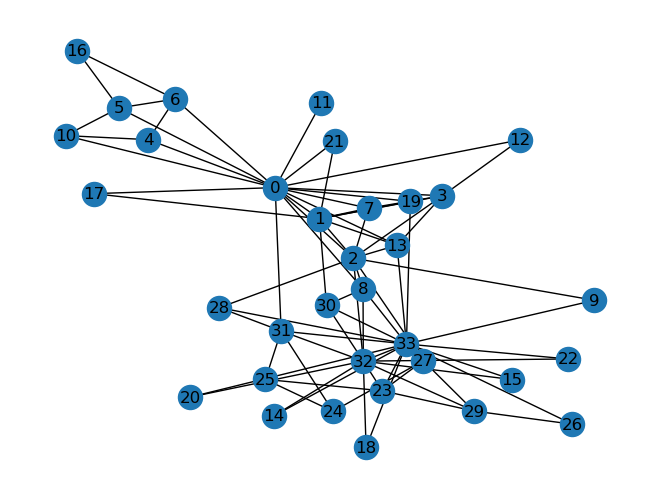

In [2]:
G = nx.karate_club_graph()

nx.draw(G, with_labels = True)

In [3]:
print('Le nombre des noeuds est : ' ,G.number_of_nodes()) # pour calculer le nbre de noeuds dans le graphe G
print('Le nombre des arrêts est : ' ,G.number_of_edges()) # pour calculer le nbre de arrêts dans le graphe G

Le nombre des noeuds est :  34
Le nombre des arrêts est :  78


# Graphe en Tenseur

Nous allons transformer le graphe $G$ en tenseur Pytorch.

In [4]:
import torch

c:\Users\ELITEBOOK\anaconda3\envs\ner\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Liste des arêtes positives du Karaté club en format `torch.LongTensor`.

In [5]:
for edge in G.edges() :
    print(edge)
    break

(0, 1)


In [6]:
def graph_to_edge_list(G):

  # Cette fonction retourne la liste des arêtes d'un graphe sous forme
  # de couplet composé de deux noeuds.


  ############# Code ############
  edge_list = []

  for edge in G.edges():
    edge_list.append(edge)
  #########################################
  return edge_list

def edge_list_to_tensor(edge_list):

  # Cette fonction transforme un liste d'arêtes en Tenseur Pytorch
  # de dimension [2 x len(edge_list)]

  edge_index = torch.tensor([])

  ############# Code ############
  edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
# print(pos_edge_list)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("La dimension de pos_edge_index est : {}".format(pos_edge_index.shape))
print("La somme des valeurs de os_edge_index : {}".format(torch.sum(pos_edge_index)))

La dimension de pos_edge_index est : torch.Size([2, 78])
La somme des valeurs de os_edge_index : 2535


In [7]:
pos_edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32,
         33, 32, 33, 32, 33, 33]])

In [8]:
pos_edge_list

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]



## Liste des arêtes négatives.

In [9]:
import random

def sample_negative_edges(G, num_neg_samples):

  # Cette fonction retourne la liste des arêtes négatives.

  neg_edge_list = []
  pos_edge_list= graph_to_edge_list(G)

  ############# Code ############
  for i in range(34) :
        for j in range(34) :
            #   if len(neg_edge_list) >= num_neg_samples :
            #         break
            #   else :
            if (i,j) not in pos_edge_list and (j,i) not in pos_edge_list :
                  if (j,i) not in neg_edge_list :
                        neg_edge_list.append((i,j)) 
        
  ###############################

  return random.sample(neg_edge_list,num_neg_samples)

# Echantillon de 78 arêtes négatives
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Convertir la liste des arêtes négatives en tenseur
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("Le tenseur neg_edge_index est de dimension {}".format(neg_edge_index.shape))


# Echantillon de 78 arêtes négatives
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Convertir la liste des arêtes négatives en tenseur
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("Le tenseur neg_edge_index est de dimension {}".format(neg_edge_index.shape))


Le tenseur neg_edge_index est de dimension torch.Size([2, 78])
Le tenseur neg_edge_index est de dimension torch.Size([2, 78])


In [10]:
len(neg_edge_list)

78

In [11]:
print(neg_edge_index)

tensor([[ 5, 14,  6,  5, 32,  4, 11,  1,  4, 17, 10, 12,  5,  6, 12,  1,  7, 11,
         14, 20, 14,  4, 17, 10,  4, 21,  7,  8, 12,  6, 25, 14, 20, 11,  3, 11,
          5,  5, 13,  6, 15,  6, 19, 16,  2, 16,  8,  0,  8,  1,  5,  7,  2,  6,
          9,  4, 18, 10, 15, 19, 17,  4, 20, 22, 25, 12,  6, 13,  9, 27,  9,  2,
          7,  6,  6, 21,  6, 19],
        [28, 31, 12,  5, 32, 33, 30, 22, 14, 21, 10, 25, 13, 15, 20, 27, 33, 24,
         19, 31, 22, 29, 17, 14, 28, 28, 10, 22, 13, 24, 28, 29, 20, 23, 33, 12,
         15, 32, 20, 21, 27, 18, 26, 32, 24, 18,  8, 32, 25, 20,  7, 25, 19, 33,
         19, 20, 18, 27, 18, 19, 25, 30, 21, 27, 29, 23,  7, 29, 24, 28, 32, 31,
         23, 32, 17, 21, 28, 29]])


# Node Embeddings

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


On va utiliser ici le module [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) de PyTorch.

In [13]:
# Initialisation de la couche d'embeddings
# avec, par exemple, 4 objets de dimension 8 chacun

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Embedding layer: {}'.format(emb_sample))

Embedding layer: Embedding(4, 8)


On peut sélectionner l'embedding d'un objet en utilisant l'indice correspondant.

In [14]:
# Sélectionner un seul embedding
id = torch.LongTensor([1])
print(emb_sample(id))

# Sélectionner plusieurs embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Obtenir la dimension de la mtrice de poids de l'embedding
shape = emb_sample.weight.data.shape
print(emb_sample.weight.data)
print(shape)

# Affecter de nouvelles valeurs à la matrice de poids (ici des 1)
emb_sample.weight.data = torch.ones(shape)

# Vérifier la nouvelle affectation
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-0.2403, -0.9409, -0.9795, -0.4125,  0.5874,  1.2357, -1.8493, -0.9711]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.2403, -0.9409, -0.9795, -0.4125,  0.5874,  1.2357, -1.8493, -0.9711],
        [ 1.8179,  0.2410, -0.8797, -0.3686, -0.6836, -0.3982, -1.6545,  0.7655]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.0525, -0.4828, -0.1315, -0.5234, -0.8036, -1.1904, -0.4809, -0.1549],
        [-0.2403, -0.9409, -0.9795, -0.4125,  0.5874,  1.2357, -1.8493, -0.9711],
        [-0.1443,  1.7683,  1.3900,  0.1524,  0.8590, -2.0149, -0.9359,  0.4889],
        [ 1.8179,  0.2410, -0.8797, -0.3686, -0.6836, -0.3982, -1.6545,  0.7655]])
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


On va appliquer à cela au jeu de données Zachary's karaté club.


*   On veut associer un vecteur de dimension 16 à chaque noeud du graphe.
*   on veut initialiser la matrice avec une distribution uniforme dans $[0, 1]$ en utilisant [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).



In [15]:
torch.manual_seed(1) #Sets the seed for generating random numbers. Returns a torch.Generator object

def create_node_emb(num_node=34, embedding_dim=16):

  # Ecrire une fonction qui implémente la matrice d'embeddings pour les noeuds.
  # La fonction doit retourner un embedding de format torch.nn initalisé selon
  # une loi uniforme dans [0,1].

  emb = None

  ############# Code ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  shape = emb.weight.data.shape
  emb.weight.data = torch.rand(shape)
  ###############################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

print("Embedding: {}".format(emb))

print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualisation des embeddings

Nous allons projet les embeddings inialisés ci-dessous en deux dimensions afin de les visualiser.

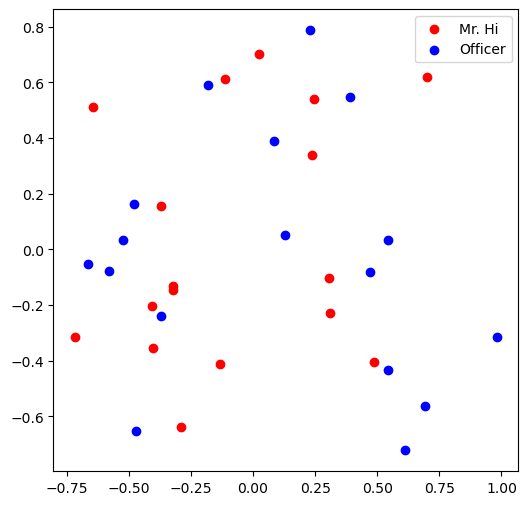

In [16]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

visualize_emb(emb)

## Calcul des embeddings par descente du gradient.

In [20]:
from torch.optim import Adam # Ici j'ai changé la fonction d'optimisation pour obtenir un modèle plus performant
from torch.nn import CrossEntropyLoss # Ainsi que j'ai changé la fonction loss, pour avoir un modèle plus performant

def accuracy(pred, label):
  # Cette fonction prend les prédictions réalisées,
  # les arrondit et calcul la précision du modèle.

  accu = 0.0
  accu = torch.sum(torch.round(pred) == label) / pred.shape[0]

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # Cette fonction entraîne les embeddings par ADAM.
  # A faire :
  # 1 : récupérer les embeddings respectifs des noeuds à partir de train_edge
  # 2 : Calculer le produit scalaire des embeddings de chaque paire de noeuds
  # 3 : Appliquer une fonction sigmoïde au produit scalaire calculé
  # 4 : Appliquer la loss_fn au résultat de la fonction sigmoïde
  # 5 : Imprimer la fonction loss et la précision à chaque epoch.
  # (as a sanity check, the loss should decrease during training)



  epochs = 500
  learning_rate = 0.1

  optimizer = Adam(emb.parameters(), lr=learning_rate)

  for i in range(epochs):

    ############# Code ###########
    # 1 : récupération des embeddings des noeuds à partir de train_edge
    node1_emb = emb(train_edge[0])
    node2_emb = emb(train_edge[1])

    # 2 : Le calcul du produit scalaire en sommanr sur chaque colonne pour obtenir un vecteur.
    dot_product = torch.sum(node1_emb * node2_emb, dim=1)

    # 3 : l'application de la fonction sigmoide sur le produit scalaire
    scores = sigmoid(dot_product)

    # 4 : application de la fonction loss
    loss = loss_fn(scores, train_label)

    # 5 : la rétro-propagation et optimisation et évaluation de la précision
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    accu = accuracy(scores, train_label)
    # Imprimer la fonction loss et la précision à chaque epoch
    print(f'Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accu.item():.4f}')


    ##############################


# Générer les labels positifs et négatifs
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concaténer les labels positifs and négatifs dans le même tenseur
train_label = torch.cat([pos_label, neg_label], dim=0)


train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

# Définir la fonction de perte CrossEntrepyLoss et la fonction sigmoïde
loss_fn = CrossEntropyLoss()
sigmoid = torch.nn.Sigmoid()

train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch [1/500], Loss: 371.8206, Accuracy: 0.9231
Epoch [2/500], Loss: 370.6706, Accuracy: 0.9231
Epoch [3/500], Loss: 370.0733, Accuracy: 0.9231
Epoch [4/500], Loss: 369.6550, Accuracy: 0.9231
Epoch [5/500], Loss: 369.3523, Accuracy: 0.9295
Epoch [6/500], Loss: 369.2422, Accuracy: 0.9295
Epoch [7/500], Loss: 369.1561, Accuracy: 0.9295
Epoch [8/500], Loss: 368.9572, Accuracy: 0.9295
Epoch [9/500], Loss: 368.7899, Accuracy: 0.9359
Epoch [10/500], Loss: 368.7494, Accuracy: 0.9359
Epoch [11/500], Loss: 368.6905, Accuracy: 0.9359
Epoch [12/500], Loss: 368.4791, Accuracy: 0.9423
Epoch [13/500], Loss: 368.3354, Accuracy: 0.9423
Epoch [14/500], Loss: 368.3210, Accuracy: 0.9423
Epoch [15/500], Loss: 368.3211, Accuracy: 0.9423
Epoch [16/500], Loss: 368.3216, Accuracy: 0.9423
Epoch [17/500], Loss: 368.3207, Accuracy: 0.9423
Epoch [18/500], Loss: 368.3190, Accuracy: 0.9423
Epoch [19/500], Loss: 368.3171, Accuracy: 0.9423
Epoch [20/500], Loss: 368.3157, Accuracy: 0.9423
Epoch [21/500], Loss: 368.314

## Visualisation des embeddings calculés

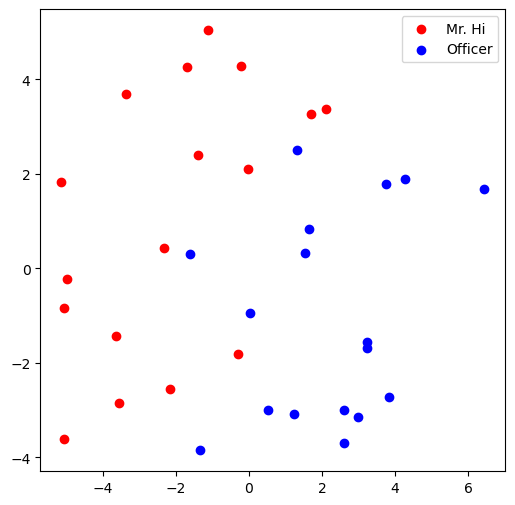

In [21]:
visualize_emb(emb)